<a href="https://colab.research.google.com/github/massivetriceps/AI/blob/main/week5/heart_prc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [3]:
df = pd.read_csv("heart.csv")
X = df.drop(columns=["target"])
y = df["target"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # 이진 분류: sigmoid
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=16, validation_split=0.1)

Epoch 1/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5107 - loss: 0.7069 - val_accuracy: 0.6000 - val_loss: 0.6714
Epoch 2/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6891 - loss: 0.6357 - val_accuracy: 0.6400 - val_loss: 0.6077
Epoch 3/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7779 - loss: 0.5837 - val_accuracy: 0.7600 - val_loss: 0.5514
Epoch 4/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8395 - loss: 0.5273 - val_accuracy: 0.8000 - val_loss: 0.5022
Epoch 5/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7717 - loss: 0.5025 - val_accuracy: 0.8000 - val_loss: 0.4648
Epoch 6/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8128 - loss: 0.4780 - val_accuracy: 0.8000 - val_loss: 0.4329
Epoch 7/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8056 - loss: 0.4408 - val_accuracy: 0.8000 - val_loss: 0.4106
Epoch 8/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8336 - loss: 0.4023 - val_accuracy: 0.8000 - val_loss

In [9]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8287 - loss: 0.3981
Test Accuracy: 0.8525


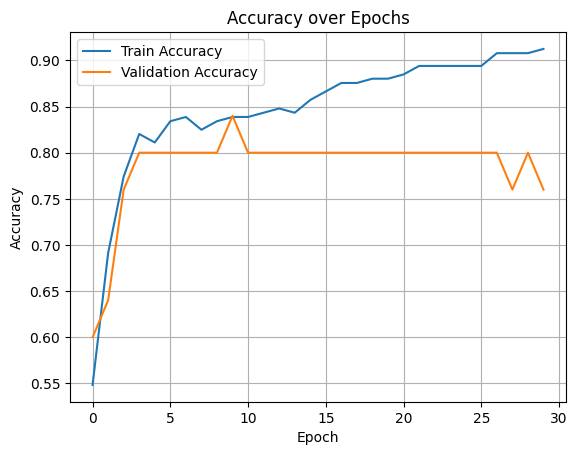

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()